##Loading the dataset

In [ ]:
import pandas as pd

# Read the contents of Sentences_50Agree.txt into a list, specifying the encoding
with open("Sentences_50Agree.txt", "r", encoding="utf-8", errors="ignore") as file:
    lines = file.readlines()

# Initialize lists to store sentences and labels
sentences = []
labels = []

# Iterate through each line and split into sentence and label
for line in lines:
    # Split the line into sentence and label
    parts = line.strip().split("@")
    sentence = parts[0].strip()
    label = parts[1].strip() if len(parts) > 1 else None
    # Append sentence and label to lists
    sentences.append(sentence)
    labels.append(label)
# Create a DataFrame from the lists
df = pd.DataFrame({"sentence": sentences, "label": labels})
# Display the first few rows of the DataFrame
print(df.head())

                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  Technopolis plans to develop in stages an area...   neutral
2  The international electronic industry company ...  negative
3  With the new production plant the company woul...  positive
4  According to the company 's updated strategy f...  positive


##Preprocessing

In [ ]:
# Define a dictionary to map labels to numerical values
label_map = {"negative": 0, "neutral": 1, "positive": 2}

# Map labels to numerical values using the dictionary
df["label"] = df["label"].map(label_map)

# Display the updated DataFrame
print(df.head())

                                            sentence  label
0  According to Gran , the company has no plans t...      1
1  Technopolis plans to develop in stages an area...      1
2  The international electronic industry company ...      0
3  With the new production plant the company woul...      2
4  According to the company 's updated strategy f...      2


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def preprocess(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Split sentence into words
    words = sentence.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    return ' '.join(words)

df['sentence'] = df['sentence'].apply(preprocess)

print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            sentence  label
0  according gran , company plans move production...      1
1  technopolis plans develop stages area less 100...      1
2  international electronic industry company elco...      0
3  new production plant company would increase ca...      2
4  according company 's updated strategy years 20...      2


<Axes: ylabel='label'>

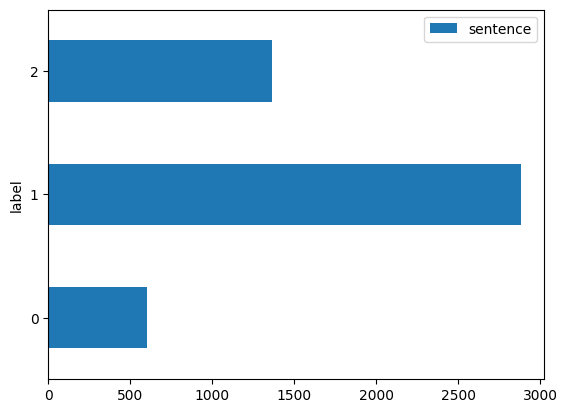

In [ ]:
df.groupby('label').count().plot.barh()

###Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertModel
import torch
from sklearn.linear_model import LogisticRegression

# Step 1: Split Data
X = df['sentence']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Step 1: Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 2: Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Step 3: Predict on test data
nb_pred = nb_classifier.predict(X_test_tfidf)

# Step 4: Generate classification report for Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("Classification Report for Naive Bayes:")
print(nb_report)


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07       110
           1       0.68      0.98      0.80       571
           2       0.66      0.33      0.44       289

    accuracy                           0.68       970
   macro avg       0.78      0.45      0.44       970
weighted avg       0.71      0.68      0.61       970



In [ ]:
nb_accuracy = accuracy_score(y_test, nb_pred)
print(nb_accuracy)

0.6793814432989691


##SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 2: Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Step 3: Predict on test data
svm_pred = svm_classifier.predict(X_test_tfidf)

# Step 4: Generate classification report for SVM
svm_report = classification_report(y_test, svm_pred)
print("\nClassification Report for SVM:")
print(svm_report)



Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       110
           1       0.75      0.93      0.83       571
           2       0.76      0.51      0.61       289

    accuracy                           0.76       970
   macro avg       0.76      0.65      0.69       970
weighted avg       0.76      0.76      0.74       970



In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print(svm_accuracy)

0.756701030927835


##Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 2: Train Logistic Regression classifier
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Step 3: Predict on test data
lr_pred = lr_model.predict(X_test_tfidf)

# Step 4: Generate classification report for SVM
lr_report = classification_report(y_test, lr_pred)
print("\nClassification Report for LR:")
print(lr_report)



Classification Report for LR:
              precision    recall  f1-score   support

           0       0.82      0.41      0.55       110
           1       0.73      0.96      0.83       571
           2       0.79      0.45      0.57       289

    accuracy                           0.74       970
   macro avg       0.78      0.61      0.65       970
weighted avg       0.76      0.74      0.72       970



In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print(lr_accuracy)

0.743298969072165


##Installing transformers

Installing transformers to employ the BERT models

In [ ]:
!pip install huggingface_hub
!pip install transformers

In [ ]:
import transformers
import torch

In [ ]:
# Tokenization
model_pkg = 'distilbert-base-uncased'
distilbert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_pkg)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

##Logistic Regression using BERT embeddings

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Take only the first 1000 rows
df = df[:1000]

# Load the pre-trained BERT tokenizer
model_pkg = 'distilbert-base-uncased'
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_pkg)

# Tokenize the sentences
tokenized_sentences = distilbert_tokenizer(list(df["sentence"]), padding=True, truncation=True, return_tensors='pt')

# Load the pre-trained BERT model
distilbert_model = AutoModel.from_pretrained(model_pkg)

# Set the model to evaluation mode
distilbert_model.eval()

# Pass the tokenized sentences through the BERT model to obtain embeddings
with torch.no_grad():
    outputs = distilbert_model(**tokenized_sentences)

# Extract embeddings for the [CLS] token
cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# Encode labels
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Split dataset into train and test sets
train_df, test_df, train_labels, test_labels = train_test_split(cls_embeddings, df["label_encoded"].values, test_size=0.2, random_state=42)

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(train_df, train_labels)

# Predict labels for test data
predictions = logreg_model.predict(test_df)

# Evaluate model performance
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Accuracy: 0.81


In [ ]:
from sklearn.metrics import classification_report

# Predict labels for test data
predictions = logreg_model.predict(cls_embeddings[len(train_df):])

# Generate classification report
report = classification_report(test_labels, predictions)

# Print classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        36
           2       0.78      0.95      0.85       157

    accuracy                           0.74       200
   macro avg       0.26      0.32      0.28       200
weighted avg       0.61      0.74      0.67       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Naive Bayes has lowest accuracy of 67.93%, while SVM and Logistic
Regression are performing well with 75.67% and 74.32% accuracies respectively.

The accuracies from BERT embeddings is 81% accurate.

I am choosing Logistic Regression with BERT embeddings to determine the correlation between annotator agreement and performance of the model.

###Accuracy for 66% agreement

In [ ]:
import pandas as pd

# Read the contents of Sentences_50Agree.txt into a list, specifying the encoding
with open("Sentences_66Agree.txt", "r", encoding="utf-8", errors="ignore") as file:
    lines = file.readlines()

# Initialize lists to store sentences and labels
sentences = []
labels = []

# Iterate through each line and split into sentence and label
for line in lines:
    # Split the line into sentence and label
    parts = line.strip().split("@")
    sentence = parts[0].strip()
    label = parts[1].strip() if len(parts) > 1 else None
    # Append sentence and label to lists
    sentences.append(sentence)
    labels.append(label)
# Create a DataFrame from the lists
df_66 = pd.DataFrame({"sentence": sentences, "label": labels})
# Display the first few rows of the DataFrame
print(df_66.head())

                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  Technopolis plans to develop in stages an area...   neutral
2  With the new production plant the company woul...  positive
3  According to the company 's updated strategy f...  positive
4  For the last quarter of 2010 , Componenta 's n...  positive


In [ ]:
# Define a dictionary to map labels to numerical values
label_map = {"negative": 0, "neutral": 1, "positive": 2}

# Map labels to numerical values using the dictionary
df_66["label"] = df_66["label"].map(label_map)

# Display the updated DataFrame
print(df_66.head())

                                            sentence  label
0  According to Gran , the company has no plans t...      1
1  Technopolis plans to develop in stages an area...      1
2  With the new production plant the company woul...      2
3  According to the company 's updated strategy f...      2
4  For the last quarter of 2010 , Componenta 's n...      2


In [ ]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Split sentence into words
    words = sentence.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    return ' '.join(words)

df_66['sentence'] = df_66['sentence'].apply(preprocess)

print(df_66.head())

                                            sentence  label
0  according gran , company plans move production...      1
1  technopolis plans develop stages area less 100...      1
2  new production plant company would increase ca...      2
3  according company 's updated strategy years 20...      2
4  last quarter 2010 , componenta 's net sales do...      2


<Axes: ylabel='label'>

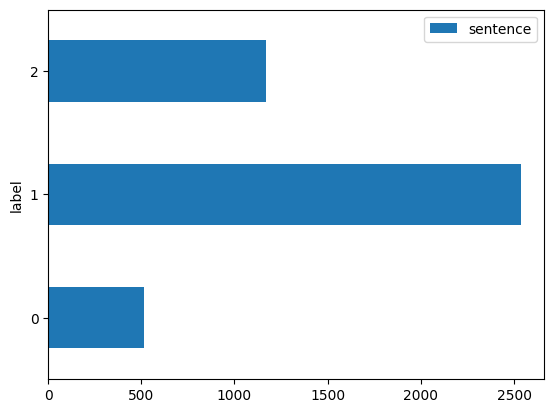

In [ ]:
df_66.groupby('label').count().plot.barh()

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Take only the first 1000 rows
df_66 = df_66[:1000]

# Load the pre-trained BERT tokenizer
model_pkg = 'distilbert-base-uncased'
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_pkg)

# Tokenize the sentences
tokenized_sentences = distilbert_tokenizer(list(df_66["sentence"]), padding=True, truncation=True, return_tensors='pt')

# Load the pre-trained BERT model
distilbert_model = AutoModel.from_pretrained(model_pkg)

# Set the model to evaluation mode
distilbert_model.eval()

# Pass the tokenized sentences through the BERT model to obtain embeddings
with torch.no_grad():
    outputs = distilbert_model(**tokenized_sentences)

# Extract embeddings for the [CLS] token
cls_embeddings_66 = outputs.last_hidden_state[:, 0, :].numpy()

# Encode labels
label_encoder = LabelEncoder()
df_66["label_encoded"] = label_encoder.fit_transform(df_66["label"])

# Split dataset into train and test sets
train_df_66, test_df_66, train_labels_66, test_labels_66 = train_test_split(cls_embeddings_66, df_66["label_encoded"].values, test_size=0.2, random_state=42)

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(train_df_66, train_labels_66)

# Predict labels for test data
predictions_66 = logreg_model.predict(test_df_66)

# Evaluate model performance
accuracy_66 = accuracy_score(test_labels_66, predictions_66)
print("Accuracy:", accuracy_66)


Accuracy: 0.8


###Accuracy of 75% agreement

In [ ]:
import pandas as pd

# Read the contents of Sentences_50Agree.txt into a list, specifying the encoding
with open("Sentences_75Agree.txt", "r", encoding="utf-8", errors="ignore") as file:
    lines = file.readlines()

# Initialize lists to store sentences and labels
sentences = []
labels = []

# Iterate through each line and split into sentence and label
for line in lines:
    # Split the line into sentence and label
    parts = line.strip().split("@")
    sentence = parts[0].strip()
    label = parts[1].strip() if len(parts) > 1 else None
    # Append sentence and label to lists
    sentences.append(sentence)
    labels.append(label)
# Create a DataFrame from the lists
df_75 = pd.DataFrame({"sentence": sentences, "label": labels})
# Display the first few rows of the DataFrame
print(df_75.head())

                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  With the new production plant the company woul...  positive
2  For the last quarter of 2010 , Componenta 's n...  positive
3  In the third quarter of 2010 , net sales incre...  positive
4  Operating profit rose to EUR 13.1 mn from EUR ...  positive


In [ ]:
# Define a dictionary to map labels to numerical values
label_map = {"negative": 0, "neutral": 1, "positive": 2}

# Map labels to numerical values using the dictionary
df_75["label"] = df_75["label"].map(label_map)

# Display the updated DataFrame
print(df_75.head())

                                            sentence  label
0  According to Gran , the company has no plans t...      1
1  With the new production plant the company woul...      2
2  For the last quarter of 2010 , Componenta 's n...      2
3  In the third quarter of 2010 , net sales incre...      2
4  Operating profit rose to EUR 13.1 mn from EUR ...      2


In [ ]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def preprocess(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Split sentence into words
    words = sentence.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    return ' '.join(words)

df_75['sentence'] = df_75['sentence'].apply(preprocess)

print(df.head())

                                            sentence  label  label_encoded
0  according gran , company plans move production...      1              1
1  technopolis plans develop stages area less 100...      1              1
2  international electronic industry company elco...      0              0
3  new production plant company would increase ca...      2              2
4  according company 's updated strategy years 20...      2              2


<Axes: ylabel='label'>

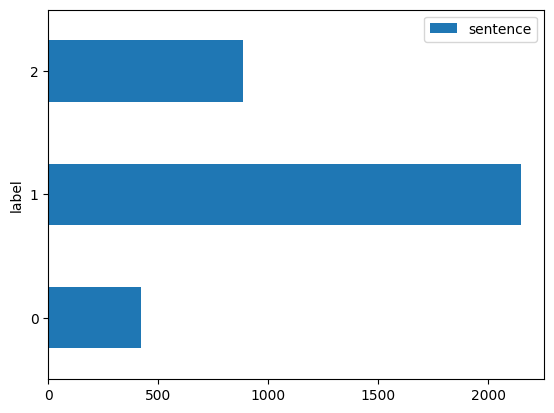

In [ ]:
df_75.groupby('label').count().plot.barh()

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Take only the first 1000 rows
df_75 = df_75[:1000]

# Load the pre-trained BERT tokenizer
model_pkg = 'distilbert-base-uncased'
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_pkg)

# Tokenize the sentences
tokenized_sentences = distilbert_tokenizer(list(df_75["sentence"]), padding=True, truncation=True, return_tensors='pt')

# Load the pre-trained BERT model
distilbert_model = AutoModel.from_pretrained(model_pkg)

# Set the model to evaluation mode
distilbert_model.eval()

# Pass the tokenized sentences through the BERT model to obtain embeddings
with torch.no_grad():
    outputs = distilbert_model(**tokenized_sentences)

# Extract embeddings for the [CLS] token
cls_embeddings_75 = outputs.last_hidden_state[:, 0, :].numpy()

# Encode labels
label_encoder = LabelEncoder()
df_75["label_encoded"] = label_encoder.fit_transform(df_75["label"])

# Split dataset into train and test sets
train_df_75, test_df_75, train_labels_75, test_labels_75 = train_test_split(cls_embeddings_75, df_75["label_encoded"].values, test_size=0.2, random_state=42)

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(train_df_75, train_labels_75)

# Predict labels for test data
predictions_75 = logreg_model.predict(test_df_75)

# Evaluate model performance
accuracy_75 = accuracy_score(test_labels_75, predictions_75)
print("Accuracy:", accuracy_75)


Accuracy: 0.845


###Accuracy of 100% agreement

In [ ]:
import pandas as pd

# Read the contents of Sentences_50Agree.txt into a list, specifying the encoding
with open("Sentences_AllAgree.txt", "r", encoding="utf-8", errors="ignore") as file:
    lines = file.readlines()

# Initialize lists to store sentences and labels
sentences = []
labels = []

# Iterate through each line and split into sentence and label
for line in lines:
    # Split the line into sentence and label
    parts = line.strip().split("@")
    sentence = parts[0].strip()
    label = parts[1].strip() if len(parts) > 1 else None
    # Append sentence and label to lists
    sentences.append(sentence)
    labels.append(label)
# Create a DataFrame from the lists
df_100 = pd.DataFrame({"sentence": sentences, "label": labels})
# Display the first few rows of the DataFrame
print(df_100.head())

                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  For the last quarter of 2010 , Componenta 's n...  positive
2  In the third quarter of 2010 , net sales incre...  positive
3  Operating profit rose to EUR 13.1 mn from EUR ...  positive
4  Operating profit totalled EUR 21.1 mn , up fro...  positive


In [ ]:
# Define a dictionary to map labels to numerical values
label_map = {"negative": 0, "neutral": 1, "positive": 2}

# Map labels to numerical values using the dictionary
df_100["label"] = df_100["label"].map(label_map)

# Display the updated DataFrame
print(df_100.head())

                                            sentence  label
0  According to Gran , the company has no plans t...      1
1  For the last quarter of 2010 , Componenta 's n...      2
2  In the third quarter of 2010 , net sales incre...      2
3  Operating profit rose to EUR 13.1 mn from EUR ...      2
4  Operating profit totalled EUR 21.1 mn , up fro...      2


In [ ]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Split sentence into words
    words = sentence.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    return ' '.join(words)

df_100['sentence'] = df_100['sentence'].apply(preprocess)

print(df_100.head())

                                            sentence  label
0  according gran , company plans move production...      1
1  last quarter 2010 , componenta 's net sales do...      2
2  third quarter 2010 , net sales increased 5.2 %...      2
3  operating profit rose eur 13.1 mn eur 8.7 mn c...      2
4  operating profit totalled eur 21.1 mn , eur 18...      2


<Axes: ylabel='label'>

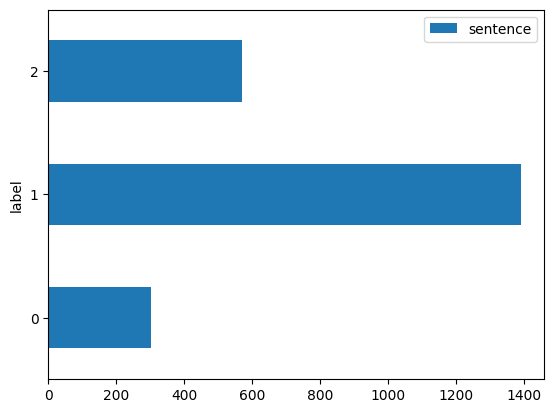

In [ ]:
df_100.groupby('label').count().plot.barh()

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Take only the first 1000 rows
df_100 = df_100[:1000]

# Load the pre-trained BERT tokenizer
model_pkg = 'distilbert-base-uncased'
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_pkg)

# Tokenize the sentences
tokenized_sentences = distilbert_tokenizer(list(df_100["sentence"]), padding=True, truncation=True, return_tensors='pt')

# Load the pre-trained BERT model
distilbert_model = AutoModel.from_pretrained(model_pkg)

# Set the model to evaluation mode
distilbert_model.eval()

# Pass the tokenized sentences through the BERT model to obtain embeddings
with torch.no_grad():
    outputs = distilbert_model(**tokenized_sentences)

# Extract embeddings for the [CLS] token
cls_embeddings_100 = outputs.last_hidden_state[:, 0, :].numpy()

# Encode labels
label_encoder = LabelEncoder()
df_100["label_encoded"] = label_encoder.fit_transform(df_100["label"])

# Split dataset into train and test sets
train_df_100, test_df_100, train_labels_100, test_labels_100 = train_test_split(cls_embeddings_100, df_100["label_encoded"].values, test_size=0.2, random_state=42)

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(train_df_100, train_labels_100)

# Predict labels for test data
predictions_100 = logreg_model.predict(test_df_100)

# Evaluate model performance
accuracy_100 = accuracy_score(test_labels_100, predictions_100)
print("Accuracy:", accuracy_100)


Accuracy: 0.885


###Pearson correlation coefficient

In [ ]:
from scipy.stats import pearsonr

annotator_agreement = [50, 66, 75, 100]
model_accuracies = [accuracy, accuracy_66, accuracy_75, accuracy_100]

correlation, p_value = pearsonr(annotator_agreement, model_accuracies)
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}')


Pearson correlation coefficient: 0.9067846841439041
p-value: 0.09321531585609577


The correlation coefficient is very high with a value of 0.906 indicating a very high positive linear relationship between annotator agreement and model performance

The p-value, however, greater than 0.05, meaning the coefficient is not statistical significant.

In conclusion, although there is a strong positive relationship between annotator agreement and model performance, it cannot be said that it is statistically significant, this can be a random occurance as well.